<a href="https://colab.research.google.com/github/Parsayarya/Mnist/blob/main/Mnist1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

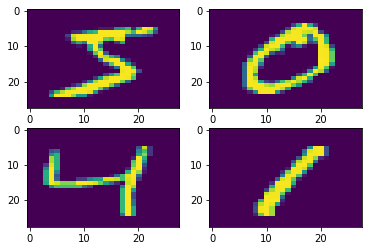

In [ ]:
fig, ax = plt.subplots(2, 2)
k = 0
 
for i in range(2):
    for j in range(2):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [ ]:
# number of classes
K = len(set(y_train))
 
# calculate total number of classes
# for output layer
print("number of classes:", K)

number of classes: 10


In [ ]:
x_train,x_test = x_train.reshape((x_train.shape[0], 28, 28, 1)),x_test.reshape((x_test.shape[0], 28, 28, 1))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [ ]:
x_train,x_test = x_train/255.0,x_test/255.0

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
	y_train = to_categorical(y_train)
	y_test = to_categorical(y_test)

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),activation='relu')(i)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               692352    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                           

In [ ]:
optim = SGD(learning_rate=0.01,momentum=0.9)

In [ ]:
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2326 - accuracy: 0.9294 - val_loss: 0.0974 - val_accuracy: 0.9700
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0756 - accuracy: 0.9775 - val_loss: 0.0591 - val_accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0596 - val_accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0432 - val_accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0413 - val_accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0387 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0446 - val_ac

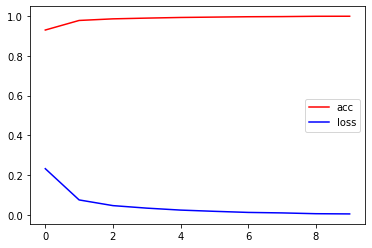

In [ ]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['loss'],label="loss",color="blue")
plt.legend()

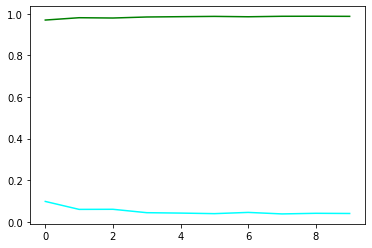

In [ ]:
plt.plot(r.history['val_loss'],label="val_loss",color="cyan")
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.show()

In [ ]:
y_test[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
labels = '''0 1 2 3 4 5 6 7 8 9'''.split()
 
# select the image from our test dataset
image_number = 666
 
# display the image
cv2_imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1,28, 28, 1)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

Original label is 7 and predicted label is 7
